<a href="https://www.kaggle.com/code/tsvetakamenovay/la-crime-tsveta-kamenova?scriptVersionId=259453714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
crime = pd.read_csv('/kaggle/input/la-crime/Crime_Data_from_2020_to_Present_20250812.csv')

# Understand and Clean Data

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [3]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
crime.shape

(1004991, 28)

In [5]:
crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
#Check Nulls
crime.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151619
Vict Age                0
Vict Sex           144644
Vict Descent       144656
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677744
Weapon Desc        677744
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935831
Crm Cd 3          1002677
Crm Cd 4          1004927
LOCATION                0
Cross Street       850755
LAT                     0
LON                     0
dtype: int64

In [7]:
df = crime.drop(labels = ['Mocodes', 'Weapon Used Cd', 'Weapon Desc',
                          'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis = 1)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,M,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,M,H,102.0,SIDEWALK,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,M,W,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,F,A,101.0,STREET,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,M,H,103.0,ALLEY,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,02/02/2025 12:00:00 AM,02/02/2025 12:00:00 AM,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,M,X,101.0,STREET,IC,Invest Cont,946.0,22100 ROSCOE BL,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,M,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,237.0,3500 PERCY ST,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,F,H,101.0,STREET,IC,Invest Cont,850.0,300 E 53RD ST,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,721.0,HIGH SCHOOL,IC,Invest Cont,624.0,9600 ZELZAH AV,34.2450,-118.5233


In [8]:
df.sort_values(by = 'Date Rptd')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
35660,202104033,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2140,21,Topanga,2136,2,901,VIOLATION OF RESTRAINING ORDER,...,M,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,901.0,7500 JORDAN AV,34.2065,-118.6029
42108,201904040,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1330,19,Mission,1993,2,860,BATTERY WITH SEXUAL CONTACT,...,F,W,101.0,STREET,IC,Invest Cont,860.0,8100 N SEPULVEDA BL,34.2181,-118.4664
31747,201404027,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,14,Pacific,1458,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,511.0,PROJECT/TENEMENT/PUBLIC HOUSING,AA,Adult Arrest,624.0,4900 SLAUSON AV,33.9950,-118.4090
131531,200704005,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,40,7,Wilshire,721,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,F,W,503.0,HOTEL,AO,Adult Other,626.0,400 S LA CIENEGA BL,34.0735,-118.3828
80412,202004053,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1605,20,Olympic,2029,1,210,ROBBERY,...,X,X,405.0,CLOTHING STORE,AA,Adult Arrest,210.0,600 S VIRGIL AV,34.0637,-118.2870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675518,230918031,12/31/2023 12:00:00 AM,12/30/2023 12:00:00 AM,655,9,Van Nuys,904,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,F,H,102.0,SIDEWALK,AO,Adult Other,236.0,7700 BURNET AV,34.2103,-118.4629
870461,230127585,12/31/2023 12:00:00 AM,12/05/2023 12:00:00 AM,1000,1,Central,111,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,F,A,707.0,GARAGE/CARPORT,IC,Invest Cont,331.0,500 N BROADWAY,34.0580,-118.2410
959580,240317263,12/31/2024 12:00:00 AM,12/30/2024 12:00:00 AM,1830,3,Southwest,327,1,510,VEHICLE - STOLEN,...,NaN,NaN,121.0,YARD (RESIDENTIAL/BUSINESS),IC,Invest Cont,510.0,1100 W 28TH ST,34.0294,-118.2840
922436,251404034,12/31/2024 12:00:00 AM,12/30/2024 12:00:00 AM,2230,14,Pacific,1494,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,F,W,212.0,TRANSPORTATION FACILITY (AIRPORT),IC,Invest Cont,341.0,800 WORLD WY,33.9434,-118.3987


In [9]:
df.dtypes

DR_NO             int64
Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Premis Desc      object
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object

In [10]:
#Update datatypes
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = '%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = '%m/%d/%Y %I:%M:%S %p')

# Then extract hour counts
hourly_crime = df['DATE OCC'].dt.hour.value_counts().sort_index().reset_index()
hourly_crime.columns = ['Hour', 'Crime Count']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   DR_NO         1004991 non-null  int64         
 1   Date Rptd     1004991 non-null  datetime64[ns]
 2   DATE OCC      1004991 non-null  datetime64[ns]
 3   TIME OCC      1004991 non-null  int64         
 4   AREA          1004991 non-null  int64         
 5   AREA NAME     1004991 non-null  object        
 6   Rpt Dist No   1004991 non-null  int64         
 7   Part 1-2      1004991 non-null  int64         
 8   Crm Cd        1004991 non-null  int64         
 9   Crm Cd Desc   1004991 non-null  object        
 10  Vict Age      1004991 non-null  int64         
 11  Vict Sex      860347 non-null   object        
 12  Vict Descent  860335 non-null   object        
 13  Premis Cd     1004975 non-null  float64       
 14  Premis Desc   1004403 non-null  object        
 15

In [12]:
df.describe(include = ['float64', 'int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,1.004980e+06,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,4.999174e+02,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,2.050736e+02,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,1.100000e+02,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,3.310000e+02,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,4.420000e+02,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,6.260000e+02,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,9.560000e+02,3.433430e+01,0.000000e+00


In [13]:
df['Vict Age'].value_counts()

Vict Age
 0      269222
 30      22289
 35      21836
 31      21420
 29      21345
         ...  
 98         71
-2          28
-3           6
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [14]:
df_age = df[df['Vict Age'] > 0]

In [15]:
df_age['Vict Age'].value_counts()

Vict Age
30     22289
35     21836
31     21420
29     21345
28     20969
       ...  
95       100
96        94
97        72
98        71
120        1
Name: count, Length: 99, dtype: int64

In [16]:
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month

In [17]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,2020,11
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,102.0,SIDEWALK,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,2020,10
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,2020,10
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,101.0,STREET,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,2020,12
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,103.0,ALLEY,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,101.0,STREET,IC,Invest Cont,946.0,22100 ROSCOE BL,34.2259,-118.6126,2025,2
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,237.0,3500 PERCY ST,34.0277,-118.1979,2025,2
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,101.0,STREET,IC,Invest Cont,850.0,300 E 53RD ST,33.9942,-118.2701,2025,1
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,721.0,HIGH SCHOOL,IC,Invest Cont,624.0,9600 ZELZAH AV,34.2450,-118.5233,2025,1


In [18]:
df.sort_values(by = 'DATE OCC')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
80154,231820815,2023-12-14,2020-01-01,5,18,Southeast,1841,2,813,CHILD ANNOYING (17YRS & UNDER),...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,813.0,600 W 105TH ST,33.9407,-118.2848,2020,1
66043,201710364,2020-06-24,2020-01-01,1200,17,Devonshire,1721,2,901,VIOLATION OF RESTRAINING ORDER,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AO,Adult Other,901.0,10100 VALLEY CIRCLE BL,34.2661,-118.6153,2020,1
31431,202104070,2020-01-02,2020-01-01,1600,21,Topanga,2175,1,330,BURGLARY FROM VEHICLE,...,101.0,STREET,IC,Invest Cont,330.0,22500 DEL VALLE ST,34.1670,-118.6169,2020,1
189842,200505375,2020-02-03,2020-01-01,1400,5,Harbor,557,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,108.0,PARKING LOT,IC,Invest Cont,420.0,100 S GAFFEY ST,33.7433,-118.2923,2020,1
28244,201804270,2020-01-01,2020-01-01,1830,18,Southeast,1822,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,222.0,LAUNDROMAT,IC,Invest Cont,440.0,9500 S FIGUEROA ST,33.9501,-118.2827,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004950,250404166,2025-03-26,2025-03-25,1500,4,Hollenbeck,467,1,210,ROBBERY,...,101.0,STREET,IC,Invest Cont,210.0,MOTT ST,34.0405,-118.2070,2025,3
1004946,252104146,2025-03-26,2025-03-26,633,21,Topanga,2177,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,729.0,SPECIALTY SCHOOL/OTHER,IC,Invest Cont,930.0,20800 BURBANK BL,34.1720,-118.5854,2025,3
1004983,250304291,2025-04-29,2025-04-29,425,3,Southwest,325,1,510,VEHICLE - STOLEN,...,121.0,YARD (RESIDENTIAL/BUSINESS),IC,Invest Cont,510.0,2700 ELLENDALE PL,34.0307,-118.2923,2025,4
1004916,250304295,2025-05-26,2025-05-25,1800,3,Southwest,338,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,101.0,STREET,IC,Invest Cont,522.0,3100 MCCLINTOCK AV,34.0274,-118.2850,2025,5


# Feature Understanding

<Axes: xlabel='month'>

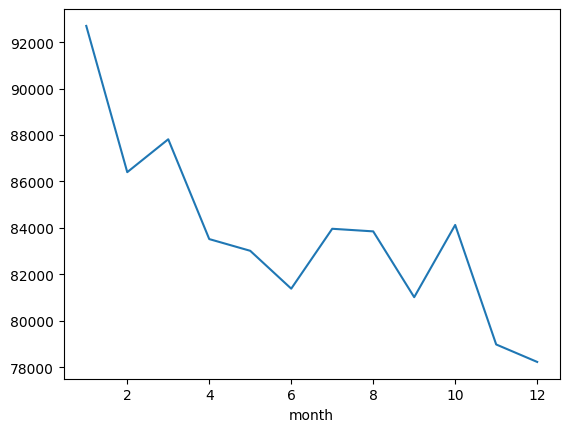

In [19]:
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

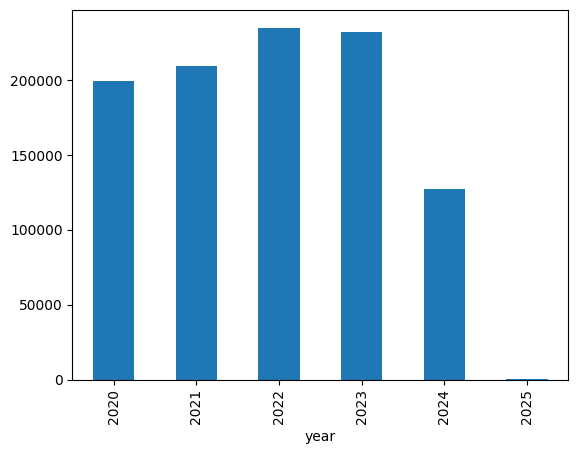

In [20]:
df['year'].value_counts().sort_index().plot(kind='bar')

In [21]:
df = df[~((df['month'] == 5) & (df['year'] == 2025))]

In [22]:
df.sort_values(by = 'DATE OCC')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
146329,200704039,2020-01-01,2020-01-01,2200,7,Wilshire,702,2,624,BATTERY - SIMPLE ASSAULT,...,108.0,PARKING LOT,IC,Invest Cont,624.0,7700 MELROSE AV,34.0837,-118.3574,2020,1
123281,200104434,2020-01-01,2020-01-01,250,1,Central,128,1,330,BURGLARY FROM VEHICLE,...,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400,2020,1
131253,201104036,2020-01-01,2020-01-01,1345,11,Northeast,1128,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,IC,Invest Cont,624.0,VERMONT,34.1225,-118.1818,2020,1
73141,231007023,2023-03-21,2020-01-01,1201,10,West Valley,1078,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",...,203.0,OTHER BUSINESS,AA,Adult Arrest,668.0,16600 VENTURA BL,34.1613,-118.4917,2020,1
23381,201504034,2020-01-01,2020-01-01,30,15,N Hollywood,1596,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,626.0,3900 VINELAND AV,34.1388,-118.3697,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004934,250804237,2025-03-19,2025-03-19,850,8,West LA,842,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,721.0,HIGH SCHOOL,IC,Invest Cont,745.0,11800 TEXAS AV,34.0458,-118.4614,2025,3
1004950,250404166,2025-03-26,2025-03-25,1500,4,Hollenbeck,467,1,210,ROBBERY,...,101.0,STREET,IC,Invest Cont,210.0,MOTT ST,34.0405,-118.2070,2025,3
1004990,251904210,2025-03-25,2025-03-25,1235,19,Mission,1944,2,850,INDECENT EXPOSURE,...,721.0,HIGH SCHOOL,IC,Invest Cont,850.0,11100 OMELVENY AV,34.2722,-118.4417,2025,3
1004946,252104146,2025-03-26,2025-03-26,633,21,Topanga,2177,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,729.0,SPECIALTY SCHOOL/OTHER,IC,Invest Cont,930.0,20800 BURBANK BL,34.1720,-118.5854,2025,3


<Axes: xlabel='year,month'>

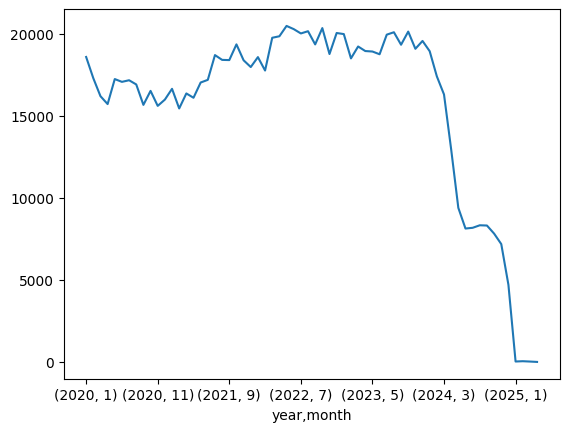

In [23]:
crime_over_time = df.groupby(['year', 'month']).size().plot()
crime_over_time

(array([3.18200e+03, 7.62400e+03, 3.07840e+04, 9.80820e+04, 1.25478e+05,
        1.18110e+05, 9.17220e+04, 7.14080e+04, 6.38530e+04, 4.25880e+04,
        3.83890e+04, 2.25110e+04, 1.23570e+04, 5.78800e+03, 2.42900e+03,
        8.29000e+02, 4.97000e+02, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2. ,   7.9,  13.8,  19.7,  25.6,  31.5,  37.4,  43.3,  49.2,
         55.1,  61. ,  66.9,  72.8,  78.7,  84.6,  90.5,  96.4, 102.3,
        108.2, 114.1, 120. ]),
 <BarContainer object of 20 artists>)

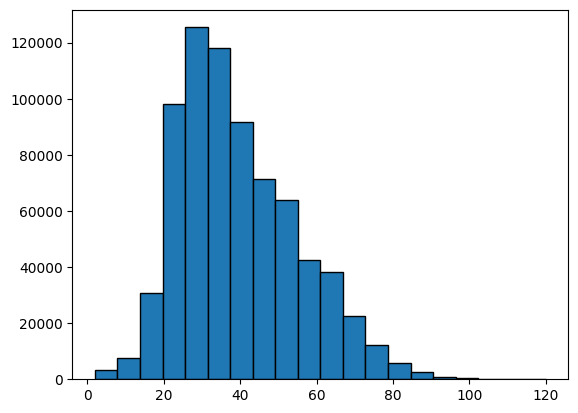

In [24]:
plt.hist(df_age['Vict Age'], edgecolor = 'black', bins = 20)

In [25]:
#df['DATE OCC_no_time'] = df['DATE OCC'].dt.date
df.loc[:, 'DATE OCC_no_time'] = df['DATE OCC'].dt.date
df

/tmp/ipykernel_13/192193587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DATE OCC_no_time'] = df['DATE OCC'].dt.date


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,DATE OCC_no_time
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,2020,11,2020-11-07
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,2020,10,2020-10-18
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,2020,10,2020-10-30
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,STREET,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,2020,12,2020-12-24
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,ALLEY,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,2020,9,2020-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,STREET,IC,Invest Cont,946.0,22100 ROSCOE BL,34.2259,-118.6126,2025,2,2025-02-02
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,SINGLE FAMILY DWELLING,IC,Invest Cont,237.0,3500 PERCY ST,34.0277,-118.1979,2025,2,2025-02-18
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,STREET,IC,Invest Cont,850.0,300 E 53RD ST,33.9942,-118.2701,2025,1,2025-01-30
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,HIGH SCHOOL,IC,Invest Cont,624.0,9600 ZELZAH AV,34.2450,-118.5233,2025,1,2025-01-17


In [26]:
crime_count_per_day = df.groupby(['DATE OCC_no_time', 'Crm Cd Desc']).size()
crime_count_per_day

DATE OCC_no_time  Crm Cd Desc                                   
2020-01-01        ARSON                                              4
                  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    47
                  ATTEMPTED ROBBERY                                  5
                  BATTERY - SIMPLE ASSAULT                          74
                  BATTERY ON A FIREFIGHTER                           1
                                                                    ..
2025-03-19        VANDALISM - MISDEAMEANOR ($399 OR UNDER)           1
2025-03-25        INDECENT EXPOSURE                                  1
                  ROBBERY                                            1
2025-03-26        CRIMINAL THREATS - NO WEAPON DISPLAYED             1
2025-04-29        VEHICLE - STOLEN                                   1
Length: 92605, dtype: int64

In [27]:
top_20_crimes = crime_count_per_day.groupby('Crm Cd Desc').mean()\
                    .reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [28]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'average_daily_count', ascending = True)

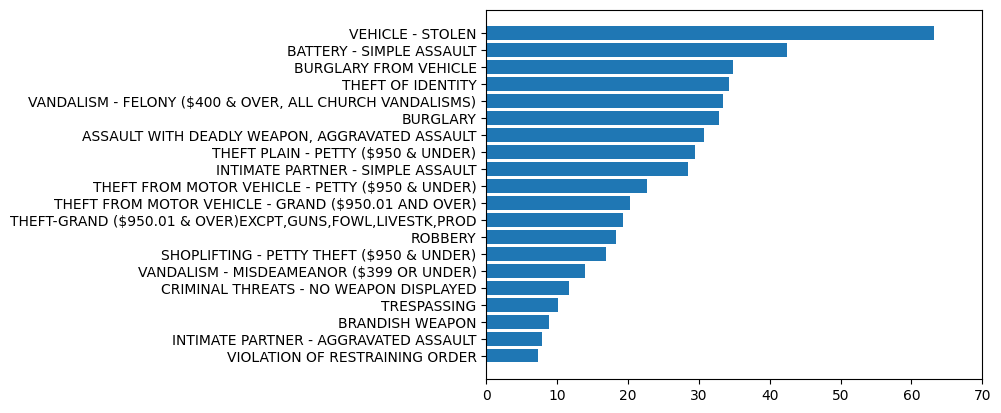

In [29]:
plt.barh(top_20_crimes_sorted['Crm Cd Desc'], top_20_crimes_sorted['average_daily_count'])
plt.style.use('classic')

In [30]:
#plt.style.available

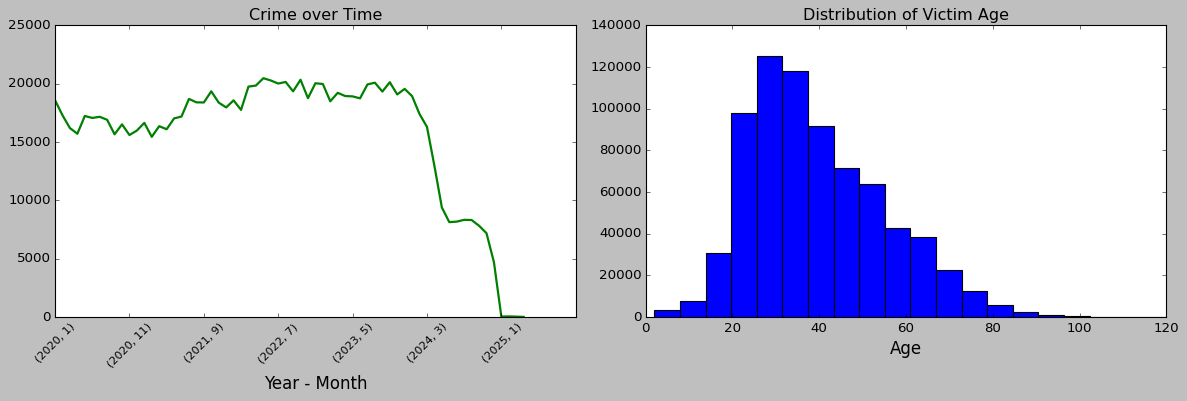

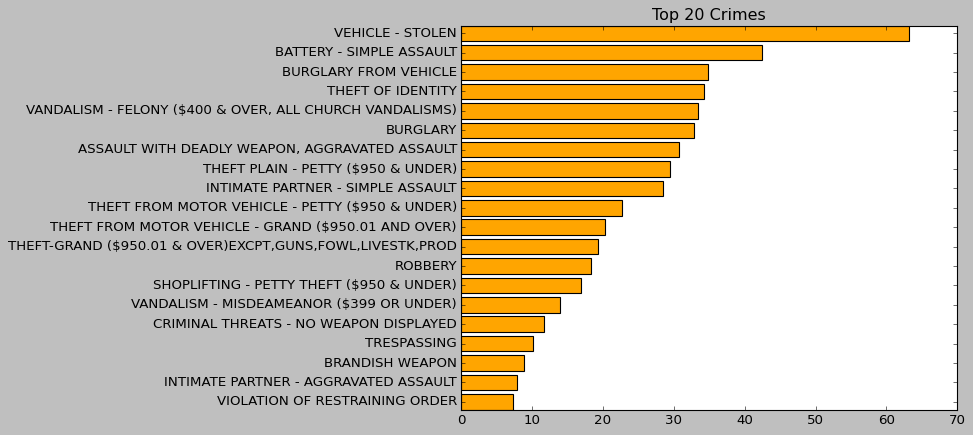

In [31]:
plt.figure(figsize = (15,9))

#Plot 1 - Line Chart
plt.subplot(2,2,1)
crime_plot = df.groupby(['year', 'month']).size().plot(color='green', linewidth=2)
plt.xticks(rotation=45, fontsize = 10, color = 'black')
crime_plot.set_xlabel('Year - Month', fontsize=15)
crime_plot.set_title('Crime over Time')

#Plot 2 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['Vict Age'], edgecolor = 'black', bins = 20)
plt.tight_layout()
plt.xlabel('Age', fontsize = 15)
plt.title('Distribution of Victim Age')

# #Plot 3 - Horizontal Bar
plt.figure()
plt.barh(top_20_crimes_sorted['Crm Cd Desc'], top_20_crimes_sorted['average_daily_count'], color = 'orange')
plt.title('Top 20 Crimes')

plt.style.use('seaborn-v0_8-poster')


In [32]:
 #Show difference in reported and occured - How long it takes to report?
df['Time to report'] = (pd.to_datetime(df['Date Rptd']) - pd.to_datetime(df['DATE OCC_no_time'])).dt.days

/tmp/ipykernel_13/2834398252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time to report'] = (pd.to_datetime(df['Date Rptd']) - pd.to_datetime(df['DATE OCC_no_time'])).dt.days


In [33]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,DATE OCC_no_time,Time to report
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,7800 BEEMAN AV,34.2124,-118.4092,2020,11,2020-11-07,155
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,ATOLL AV,34.1993,-118.4203,2020,10,2020-10-18,3
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,14600 SYLVAN ST,34.1847,-118.4509,2020,10,2020-10-30,1502
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,6000 COMEY AV,34.0339,-118.3747,2020,12,2020-12-24,0
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,4700 LA VILLA MARINA,33.9813,-118.4350,2020,9,2020-09-29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2025-02-02,2025-02-02,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,22100 ROSCOE BL,34.2259,-118.6126,2025,2,2025-02-02,0
1004987,250404100,2025-02-18,2025-02-18,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,3500 PERCY ST,34.0277,-118.1979,2025,2,2025-02-18,0
1004988,251304095,2025-01-31,2025-01-30,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,300 E 53RD ST,33.9942,-118.2701,2025,1,2025-01-30,1
1004989,251704066,2025-01-17,2025-01-17,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,9600 ZELZAH AV,34.2450,-118.5233,2025,1,2025-01-17,0


In [34]:
df['Time to report'].value_counts().reset_index().head(10)

,Time to report,count
0,0,482066
1,1,222400
2,2,64438
3,3,37531
4,4,24124
5,5,17445
6,6,13105
7,7,11741
8,8,8549
9,9,6829


In [35]:
df.groupby(['Crm Cd Desc'])['Time to report'].mean().sort_values().head(10)

Crm Cd Desc
TRAIN WRECKING                                              0.000000
DISRUPT SCHOOL                                              0.076923
PURSE SNATCHING - ATTEMPT                                   0.076923
PETTY THEFT - AUTO REPAIR                                   0.125000
LYNCHING                                                    0.136364
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.250000
BATTERY POLICE (SIMPLE)                                     0.358285
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)    0.384615
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.400000
BOMB SCARE                                                  0.490446
Name: Time to report, dtype: float64

In [36]:
#Identify the top 5 crimes with the highest average victim age

In [37]:
df_age.groupby('Crm Cd Desc')['Vict Age'].mean()\
.reset_index().sort_values(by = 'Vict Age', ascending = False).head(5)

,Crm Cd Desc,Vict Age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
54,DRUNK ROLL - ATTEMPT,58.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
78,LYNCHING,53.000000
63,GRAND THEFT / AUTO REPAIR,52.333333


In [38]:
#Find the area with the highest number of crimes occurring during nighttime
nighttime_crimes = df[(df['DATE OCC'].dt.hour >= 20) | (df['DATE OCC'].dt.hour <= 3)]

In [39]:
nighttime_crimes['AREA NAME'].value_counts()

AREA NAME
Central        69670
77th Street    61758
Pacific        59513
Southwest      57440
Hollywood      52429
N Hollywood    51107
Olympic        50071
Southeast      49936
Newton         49177
Wilshire       48239
Rampart        46825
West LA        45729
Northeast      42963
Van Nuys       42883
West Valley    42156
Devonshire     41756
Harbor         41394
Topanga        41374
Mission        40351
Hollenbeck     37085
Foothill       33133
Name: count, dtype: int64

In [40]:
#hourly_crime = df['DATE OCC'].dt.hour.value_counts().sort_index().reset_index()
#hourly_crime

df['HOUR OCC'] = (df['TIME OCC'] // 100) % 24  # Get hour from TIME OCC

hourly_crime = df['HOUR OCC'].value_counts().sort_index().reset_index()
hourly_crime.columns = ['Hour', 'Count']

/tmp/ipykernel_13/914627987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HOUR OCC'] = (df['TIME OCC'] // 100) % 24  # Get hour from TIME OCC


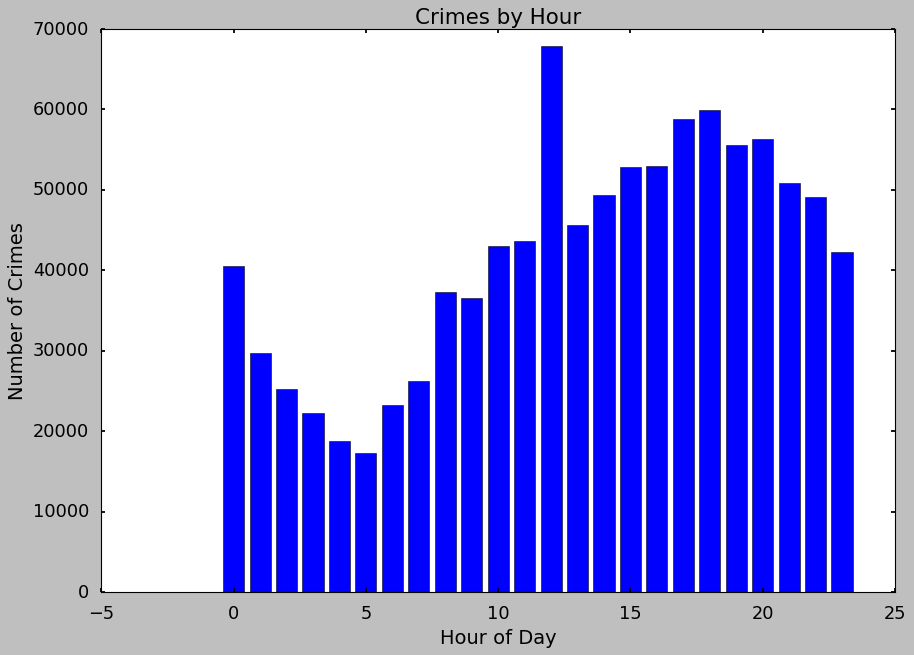

In [41]:
plt.bar(hourly_crime['Hour'], hourly_crime['Count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Hour')
plt.show()


In [42]:
# Extract the hour from TIME OCC
df = df.copy()
df['HOUR OCC'] = (df['TIME OCC'] // 100) % 24

df[df['HOUR OCC'] == 12]['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                               10381
VEHICLE - STOLEN                                 5102
THEFT PLAIN - PETTY ($950 & UNDER)               4703
BATTERY - SIMPLE ASSAULT                         4375
BURGLARY                                         3285
                                                ...  
DRUGS, TO A MINOR                                   1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)        1
BIGAMY                                              1
BRIBERY                                             1
INCITING A RIOT                                     1
Name: count, Length: 123, dtype: int64

In [43]:
no_identity_theft = df[~(df['Crm Cd Desc'] == 'THEFT OF IDENTITY')]

In [44]:
# Extract the real hour from TIME OCC
no_identity_theft = df[df['Crm Cd Desc'] != 'THEFT OF IDENTITY'].copy()
no_identity_theft['HOUR OCC'] = (no_identity_theft['TIME OCC'] // 100) % 24

# Count occurrences by hour
new_hourly_count = no_identity_theft['HOUR OCC'].value_counts().sort_index().reset_index()
new_hourly_count.columns = ['Hour', 'Count']

In [45]:
print(new_hourly_count.columns)
print(no_identity_theft.columns)

Index(['Hour', 'Count'], dtype='object')
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON', 'year', 'month',
       'DATE OCC_no_time', 'Time to report', 'HOUR OCC'],
      dtype='object')


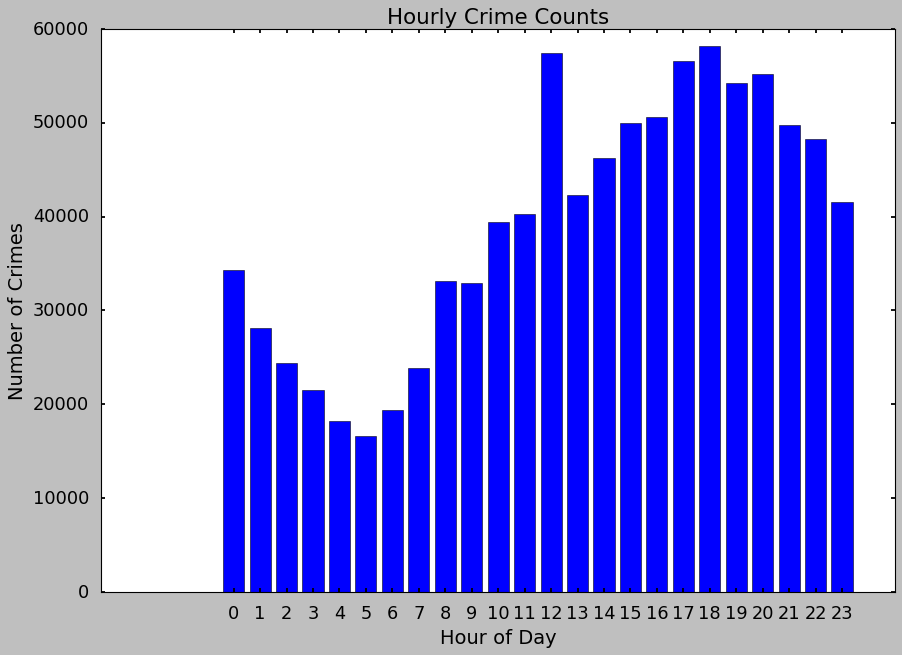

In [46]:
plt.bar(new_hourly_count['Hour'], new_hourly_count['Count'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Hourly Crime Counts')
plt.xticks(range(0, 24))  # show hours 0–23
plt.show()


In [47]:
no_identity_theft[no_identity_theft['HOUR OCC'] == 12]['Crm Cd Desc'].value_counts().head(10)

Crm Cd Desc
VEHICLE - STOLEN                                            5102
THEFT PLAIN - PETTY ($950 & UNDER)                          4703
BATTERY - SIMPLE ASSAULT                                    4375
BURGLARY                                                    3285
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    3141
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             3099
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     3036
BURGLARY FROM VEHICLE                                       2571
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              2522
INTIMATE PARTNER - SIMPLE ASSAULT                           2294
Name: count, dtype: int64